In [1]:
!pip install fsspec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 4.9 MB/s 


In [2]:
!pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.5 MB/s 
     |████████████████████████████████| 94 kB 1.2 MB/s 
     |████████████████████████████████| 144 kB 47.7 MB/s 
     |████████████████████████████████| 271 kB 40.8 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive/Colab Notebooks/tfm"
import sys
sys.path.append('tfm/checkpoints/')
sys.path.append('tfm/outputs/')
sys.path.append('tfm/inputs/')
sys.path.append('tfm/logs/')

Mounted at /content/drive


In [4]:
filepath = "tfm/outputs/dataset_2021_paragraph" # Filepath COLAB
filepath_news = "tfm/outputs/dataset_2021_news" # Filepath COLAB

In [5]:
import pandas as pd
import numpy as np

#### Análisis de resultados:

finanzas_s_n :
def func_apply(group):
#### ponderacion de pesos
idx = np.linspace(1,0,group.shape[0])
return np.sum(idx * group.finanzas_tag_s_n) / np.sum(idx)

umbral : quantile(0.7) (en este caso el quantile 0.9 tiene el mismo valor)
acc : 0.9149

impacto_s_n :
def func_apply(group):
#### ponderacion de pesos
idx = np.linspace(1,0,group.shape[0])
return np.sum(idx * group.impacto_tag_s_n) / np.sum(idx)

umbral : quantile(0.7)
acc : 0.8737

umbral : quantile(0.9)
acc : 0.7963

def func_apply(group):
#### si un parrafo tiene impacto, la noticia tiene impacto
if -1 in group.impacto_tag_s_n.unique():
return -1
else:
return 0

acc : 0.7345

In [25]:
df_news = pd.read_csv(f"{filepath_news}_predict_impacto_finanzas_tag_s_n.csv", sep=";", index_col=0, parse_dates=["date"],low_memory=False, lineterminator="\n")
df_news

,date,title,url,body,tags,resource,ticker,ticker_name,sector,subsector,...,vola20_umbral_Q3,vola20_umbral_abs_Q3,vola_label,vola_label_abs,body_no_entities,title_no_entities,impacto_tag_s_n,impacto_tag_s_proba,finanzas_tag_s_n,finanzas_tag_s_proba
pk,,,,,,,,,,,,,,,,,,,,,
1656287707697_43316_IAG,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,0.305009,0.417972,0.0,0.0,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,"Pasaportes, visados, ‘roaming’... Todos los ca...",1,0.205142,1,0.050154
1656287513236_43316_ANA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,ANA,"ACCIONA,S.A.","Mat.Basicos, Industria y Construcción",Construcción,...,0.208834,0.225065,1.0,1.0,24 componentes en negativo El Ibex cierra un a...,Las claves de la caída del Ibex,1,0.239174,1,0.184259
1656287513236_43316_BKIA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,BKIA,"BANKIA, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.236113,0.315340,1.0,1.0,24 componentes en negativo El Ibex cierra un a...,Las claves de la caída del Ibex,1,0.239174,1,0.184259
1656287513236_43316_CABK,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.290371,0.324701,1.0,1.0,24 componentes en negativo El Ibex cierra un a...,Las claves de la caída del Ibex,1,0.239174,1,0.184259
1656287513236_43316_IAG,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,0.305009,0.417972,0.0,0.0,24 componentes en negativo El Ibex cierra un a...,Las claves de la caída del Ibex,1,0.239174,1,0.184259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656406861597_6_REP,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,REP,"REPSOL, S.A.",Petróleo y Energía,Petróleo,...,-0.270908,0.357201,1.0,0.0,"MÁLAGA, 31 Dic. (EUROPA PRESS) - El alcalde de...",De la Torre sitúa a Málaga en uno de sus mejor...,1,0.109223,1,0.025300
1656406861597_6_TEF,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,-0.399914,0.477420,1.0,0.0,"MÁLAGA, 31 Dic. (EUROPA PRESS) - El alcalde de...",De la Torre sitúa a Málaga en uno de sus mejor...,1,0.109223,1,0.025300
1656407079517_9_CABK,2022-01-03 10:08:00,CaixaBank Banca Privada recomienda a gran part...,https://www.europapress.es/economia/finanzas-0...,"MADRID, 28 Dic. (EUROPA PRESS) -<EOL>CaixaBank...","['Sector financiero', 'Caixabank']",EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.059615,0.251531,1.0,1.0,"MADRID, 28 Dic. (EUROPA PRESS) - Banca Privada...",Banca Privada recomienda a gran parte de sus c...,1,0.255300,1,0.176694


In [26]:
df_news.shape

(46635, 42)

In [27]:
df_news.columns

Index(['date', 'title', 'url', 'body', 'tags', 'resource', 'ticker',
       'ticker_name', 'sector', 'subsector', 'ticker_freq', 'ticker_first',
       'ticker_title', 'tickers', 'entities', 'topic_classifier', 'topics',
       'finanzas_prob', 'sector_in_topics', 'intensidad', 'rd_activo_news',
       'rd_bench_news', 'alpha_exante', 'alpha_exante_Q1',
       'alpha_exante_below_Q1', 'alpha_exante_Q3', 'alpha_exante_above_Q3',
       'vola20_exante', 'vola20_expost', 'vola20_antepost_pct_change',
       'vola20_umbral_Q1', 'vola20_umbral_abs_Q1', 'vola20_umbral_Q3',
       'vola20_umbral_abs_Q3', 'vola_label', 'vola_label_abs',
       'body_no_entities', 'title_no_entities', 'impacto_tag_s_n',
       'impacto_tag_s_proba', 'finanzas_tag_s_n', 'finanzas_tag_s_proba'],
      dtype='object')

In [28]:
# df_paragraph = pd.read_csv(f"{filepath}_predict_impacto_finanzas_tag_s_n.csv", sep=";", index_col=0, parse_dates=["date"],low_memory=False, lineterminator="\n")
df = pd.read_csv(f"{filepath}_test.csv", sep=";", index_col=0, parse_dates=["date"],low_memory=False, lineterminator="\n")
df

,pk,pk_paragraph,date,title,url,body,tags,resource,ticker,ticker_name,...,finanzas_tag_s_n,impacto_tag_s_n,topic_tag_news,finanzas_tag_news_s_n,impacto_tag_news_s_n,impacto_tag_s_n_confianza,impacto_tag_s_proba,finanzas_tag_s_n_confianza,finanzas_tag_s_proba,vola_label_pred
231537,1656343052339_44072_IDR,1656343052339_44072_IDR_0000001880,2021-06-10 18:10:00,"El Ibex 35 baja un 0,2%, pero defiende los 9.1...",https://www.europapress.es/economia/bolsa-0034...,El barril de petróleo West Texas Intermediate ...,"['Estados Unidos', 'BCE', 'IBEX 35']",EUROPAPRESS,IDR,"INDRA SISTEMAS, S.A., SERIE A",...,1,0,NaN,NaN,NaN,0.600216,0.600216,0.703385,0.296615,0.0
231538,1656343052339_44072_IDR,1656343052339_44072_IDR_0000001881,2021-06-10 18:10:00,"El Ibex 35 baja un 0,2%, pero defiende los 9.1...",https://www.europapress.es/economia/bolsa-0034...,"Por último, la cotización del euro frente al d...","['Estados Unidos', 'BCE', 'IBEX 35']",EUROPAPRESS,IDR,"INDRA SISTEMAS, S.A., SERIE A",...,1,0,NaN,NaN,NaN,0.550089,0.550089,0.512430,0.487570,0.0
231539,1656343052339_44072_MEL,1656343052339_44072_MEL_0000001882,2021-06-10 18:10:00,"El Ibex 35 baja un 0,2%, pero defiende los 9.1...",https://www.europapress.es/economia/bolsa-0034...,"MADRID, 10 Jun. (EUROPA PRESS) -","['Estados Unidos', 'BCE', 'IBEX 35']",EUROPAPRESS,MEL,"MELIA HOTELS INTERNATIONAL, S.A.",...,1,1,NaN,NaN,NaN,0.953942,0.046058,0.984095,0.015905,2.0
231540,1656343052339_44072_MEL,1656343052339_44072_MEL_0000001883,2021-06-10 18:10:00,"El Ibex 35 baja un 0,2%, pero defiende los 9.1...",https://www.europapress.es/economia/bolsa-0034...,El índice Ibex 35 de la Bolsa de Madrid ha cer...,"['Estados Unidos', 'BCE', 'IBEX 35']",EUROPAPRESS,MEL,"MELIA HOTELS INTERNATIONAL, S.A.",...,1,1,NaN,NaN,NaN,0.512358,0.487642,0.756788,0.243212,2.0
231541,1656343052339_44072_MEL,1656343052339_44072_MEL_0000001884,2021-06-10 18:10:00,"El Ibex 35 baja un 0,2%, pero defiende los 9.1...",https://www.europapress.es/economia/bolsa-0034...,"Con respecto al primer acontecimiento, el BCE ...","['Estados Unidos', 'BCE', 'IBEX 35']",EUROPAPRESS,MEL,"MELIA HOTELS INTERNATIONAL, S.A.",...,0,0,NaN,NaN,NaN,0.741083,0.741083,0.883340,0.883340,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45433,1656300795101_43316_SAN,1656300795101_43316_SAN_0000001475,2022-01-24 16:11:00,El juez que investiga negocios inmobiliarios d...,https://www.europapress.es/nacional/noticia-ju...,Sobre la desestimación de la petición de los V...,"['Audiencia Nacional', 'Pujol']",EUROPAPRESS,SAN,"BANCO SANTANDER, S.A.",...,1,1,NaN,NaN,NaN,0.888938,0.111062,0.979352,0.020648,2.0
45434,1656300795101_43316_SAN,1656300795101_43316_SAN_0000001476,2022-01-24 16:11:00,El juez que investiga negocios inmobiliarios d...,https://www.europapress.es/nacional/noticia-ju...,"En el auto de apertura de la pieza, el magistr...","['Audiencia Nacional', 'Pujol']",EUROPAPRESS,SAN,"BANCO SANTANDER, S.A.",...,1,1,NaN,NaN,NaN,0.890964,0.109036,0.988355,0.011645,2.0
45435,1656300795101_43316_SAN,1656300795101_43316_SAN_0000001477,2022-01-24 16:11:00,El juez que investiga negocios inmobiliarios d...,https://www.europapress.es/nacional/noticia-ju...,"Además, las pesquisas se dirigían también al ""...","['Audiencia Nacional', 'Pujol']",EUROPAPRESS,SAN,"BANCO SANTANDER, S.A.",...,1,1,NaN,NaN,NaN,0.758562,0.241438,0.972690,0.027310,2.0
45436,1656300795101_43316_SAN,1656300795101_43316_SAN_0000001478,2022-01-24 16:11:00,El juez que investiga negocios inmobiliarios d...,https://www.europapress.es/nacional/noticia-ju...,"Ahora, Pedraz --apoyándose en el informe de An...","['Audiencia Nacional', 'Pujol']",EUROPAPRESS,SAN,"BANCO SANTANDER, S.A.",...,1,1,NaN,NaN,NaN,0.791468,0.208532,0.912610,0.087390,2.0


In [29]:
def func_apply(group):
    #Se pondera las etiquetas de cada párrafo asignando un peso, por ejemplo, peso de 10 al primer párrafo, el segundo de 9,... y hace una suma al final.            
    idx = np.linspace(1,0,group.shape[0])    
    return np.sum(idx * group.vola_label_pred) / np.sum(idx)

In [30]:
df_news.vola_label = df_news.vola_label + 1

In [31]:
df_news = df_news.loc[np.unique(df.pk.tolist())]

In [32]:
df_news["vola_label_pred"] = df.groupby(['pk']).apply(lambda x: func_apply(x))

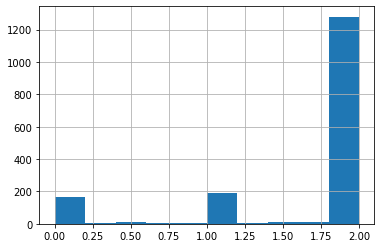

In [33]:
#NECESITAMOS DETERMINAR EL UMBRAL DE CUANDO UNA NOTICIA LA MARCAMOS COMO 0 o NO
df_news.vola_label_pred.hist()

In [34]:
def func_apply_label_calc(vola_label_pred):
    if vola_label_pred <= 0.5:
        return 0
    elif vola_label_pred > 0.5 and vola_label_pred<1.5:
        return 1
    else:
        return 2


In [35]:
df_news.vola_label_pred = df_news.vola_label_pred.apply(lambda vola_label_pred : func_apply_label_calc(vola_label_pred))
df_news

,date,title,url,body,tags,resource,ticker,ticker_name,sector,subsector,...,vola20_umbral_abs_Q3,vola_label,vola_label_abs,body_no_entities,title_no_entities,impacto_tag_s_n,impacto_tag_s_proba,finanzas_tag_s_n,finanzas_tag_s_proba,vola_label_pred
pk,,,,,,,,,,,,,,,,,,,,,
1656300795101_43316_SAN,2022-01-24 16:11:00,El juez que investiga negocios inmobiliarios d...,https://www.europapress.es/nacional/noticia-ju...,J. M. V. B. y J. M. V. C. pedían su sobreseimi...,"['Audiencia Nacional', 'Pujol']",EUROPAPRESS,SAN,"BANCO SANTANDER, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.943059,2.0,1.0,J. M. V. B. y J. M. V. C. pedían su sobreseimi...,El juez que investiga negocios inmobiliarios d...,1,0.107240,1,0.016476,2
1656317023655_22020_SAN,2021-09-14 13:48:00,Aplazado el juicio entre Banco Santander y And...,https://www.europapress.es/economia/finanzas-0...,El juicio contra Banco Santander por el fichaj...,"['Banco Santander', 'Italia', 'Sector financie...",EUROPAPRESS,SAN,"BANCO SANTANDER, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.581476,1.0,0.0,El juicio contra por el fichaje fallido del b...,Aplazado el juicio entre y Andrea Orcel,1,0.182752,1,0.026018,2
1656335719860_44072_CABK,2021-06-17 19:47:00,El Centre Pompidou presenta la muestra tempora...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 1 Jun. (EUROPA PRESS) -<EOL>El Centre ...",NaN,EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.131370,2.0,1.0,"MÁLAGA, 1 Jun. (EUROPA PRESS) - El Centre Pomp...",El Centre Pompidou presenta la muestra tempora...,1,0.053353,1,0.010260,2
1656335750957_44072_TEF,2021-06-16 17:56:00,Telefónica cierra la venta de las torres europ...,https://www.europapress.es/economia/noticia-te...,"MADRID, 1 Jun. (EUROPA PRESS) -<EOL>Telefónica...",['Telefónica'],EUROPAPRESS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,0.191333,2.0,0.0,"MADRID, 1 Jun. (EUROPA PRESS) - ha cerrado est...",cierra la venta de las torres europeas de Telx...,1,0.397783,1,0.346188,2
1656343016935_44072_CABK,2021-06-10 21:39:00,Salado asegura en el Día de la Provincia que M...,https://www.europapress.es/andalucia/malaga-00...,"El Málaga Club de Fútbol, la Fundación ""la Cai...",NaN,EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.169704,2.0,1.0,"El Málaga Club de Fútbol, la Fundación """" y St...",Salado asegura en el Día de la Provincia que M...,1,0.108693,1,0.020203,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656353230763_44072_TEF,2021-06-22 06:14:30,Telefónica ofrecerá servicios de gestión a Ame...,https://cincodias.elpais.com/cincodias/2021/06...,Telefónica va a continuar ofreciendo servicios...,"['Telefónica', 'Empresas', 'Economía', 'Teleco...",CINCODIAS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,0.152508,2.0,0.0,va a continuar ofreciendo servicios financiero...,ofrecerá servicios de gestión a American Tower...,1,0.343128,1,0.367274,2
1656353231064_44072_AENA,2021-06-22 06:13:32,Acciona Energía pedirá 3.900 millones en finan...,https://cincodias.elpais.com/cincodias/2021/06...,Los detalles de la que aspira a ser la mayor O...,"['Coronavirus Covid-19', 'Coronavirus', 'Pande...",CINCODIAS,AENA,"AENA, S.M.E., S.A.",Servicios de Consumo,Transporte y Distribución,...,0.460235,1.0,0.0,Los detalles de la que aspira a ser la mayor O...,Energía pedirá 3.900 millones en financiación ...,0,0.487171,0,0.542597,2
1656353231064_44072_ANA,2021-06-22 06:13:32,Acciona Energía pedirá 3.900 millones en finan...,https://cincodias.elpais.com/cincodias/2021/06...,Los detalles de la que aspira a ser la mayor O...,"['Coronavirus Covid-19', 'Coronavirus', 'Pande...",CINCODIAS,ANA,"ACCIONA,S.A.","Mat.Basicos, Industria y Construcción",Construcción,...,0.499193,0.0,0.0,Los detalles de la que aspira a ser la mayor O...,Energía pedirá 3.900 millones en financiac

In [37]:
df_news.vola_label_pred.value_counts()

2    1296
1     209
0     178
Name: vola_label_pred, dtype: int64

In [38]:
df_news.vola_label.value_counts()

2.0    1171
1.0     405
0.0     107
Name: vola_label, dtype: int64

In [39]:
print(df_news.vola_label.value_counts()/df_news.vola_label.count())
print(df_news.vola_label_pred.value_counts()/df_news.vola_label_pred.count())

2.0    0.695781
1.0    0.240642
0.0    0.063577
Name: vola_label, dtype: float64
2    0.770053
1    0.124183
0    0.105764
Name: vola_label_pred, dtype: float64


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(df_news.vola_label, df_news.vola_label_pred)

0.7421271538918598

# EVALUAMOS EL AGRUPADOR SOBRE EL IMPACTO

In [ ]:
df_news = pd.read_csv(file_path_news, sep=";", parse_dates=["date"], index_col=0)

In [ ]:
df_paragraph = pd.read_csv(file_path_paragraph, sep=";", parse_dates=["date"], index_col=0)

In [ ]:
df_paragraph.impacto_tag_s_n.value_counts()
# [('Sí', 0),
# ('No', 1), 
# ('Duda', 2),]

1.0    4054
0.0    1050
2.0     361
Name: impacto_tag_s_n, dtype: int64

In [ ]:
df_paragraph.impacto_tag_news_s_n.value_counts()

0.0    2527
1.0    1916
2.0    1022
Name: impacto_tag_news_s_n, dtype: int64

In [ ]:
df_paragraph["impacto_tag_s_n"] = df_paragraph["impacto_tag_s_n"] - 1
df_paragraph.impacto_tag_s_n.value_counts()
# [('Sí', -1),
# ('No', 0), 
# ('Duda', 1),]

 0.0    4054
-1.0    1050
 1.0     361
Name: impacto_tag_s_n, dtype: int64

In [ ]:
def func_apply(group):
    # ponderacion de pesos
    idx = np.linspace(1,0,group.shape[0])    
    return np.sum(idx * group.impacto_tag_s_n) / np.sum(idx)

In [ ]:
# def func_apply(group):
#     # si un parrafo tiene impacto, la noticia tiene impacto
#     if -1 in group.impacto_tag_s_n.unique():
#         return -1
#     else:
#         return 0

In [ ]:
df_paragraph = df_paragraph[df_paragraph.impacto_tag_s_n.notna()]

In [ ]:
df_paragraph

,pk_paragraph,date,title,url,body,tags,resource,ticker,ticker_name,sector,...,topic_classifier_news,topics_news,finanzas_prob_news,sector_in_topics_news,intensidad_news,finanzas_tag_s_n,impacto_tag_s_n,topic_tag_news,finanzas_tag_news_s_n,impacto_tag_news_s_n
pk,,,,,,,,,,,,,,,,,,,,,
1656289470276_43316_IAG,1656289470276_43316_IAG_0000001769,2021-01-04 12:42:44,"Qatar Airways, primer accionista de IAG, se re...",https://cincodias.elpais.com/cincodias/2021/01...,"El primer ejecutivo del grupo Qatar Airways, A...","['Qatar Airways', 'IAG', 'Coronavirus Covid-19...",CINCODIAS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,coronavirus,"{'coronavirus': 0.071973294, 'coronavirus covi...",0.039272,0,2.039272,1.0,-1.0,3.0,1.0,0.0
1656289470276_43316_IAG,1656289470276_43316_IAG_0000001770,2021-01-04 12:42:44,"Qatar Airways, primer accionista de IAG, se re...",https://cincodias.elpais.com/cincodias/2021/01...,“La evolución de la aplicación de la vacuna a ...,"['Qatar Airways', 'IAG', 'Coronavirus Covid-19...",CINCODIAS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,coronavirus,"{'coronavirus': 0.071973294, 'coronavirus covi...",0.039272,0,2.039272,1.0,-1.0,3.0,1.0,0.0
1656289470276_43316_IAG,1656289470276_43316_IAG_0000001771,2021-01-04 12:42:44,"Qatar Airways, primer accionista de IAG, se re...",https://cincodias.elpais.com/cincodias/2021/01...,"Qatar Airways, primer accionista de IAG con el...","['Qatar Airways', 'IAG', 'Coronavirus Covid-19...",CINCODIAS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,coronavirus,"{'coronavirus': 0.071973294, 'coronavirus covi...",0.039272,0,2.039272,1.0,-1.0,3.0,1.0,0.0
1656289470276_43316_IAG,1656289470276_43316_IAG_0000001772,2021-01-04 12:42:44,"Qatar Airways, primer accionista de IAG, se re...",https://cincodias.elpais.com/cincodias/2021/01...,"De forma paralela, Catar está invirtiendo en e...","['Qatar Airways', 'IAG', 'Coronavirus Covid-19...",CINCODIAS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,coronavirus,"{'coronavirus': 0.071973294, 'coronavirus covi...",0.039272,0,2.039272,1.0,-1.0,3.0,1.0,0.0
1656289470276_43316_IAG,1656289470276_43316_IAG_0000001773,2021-01-04 12:42:44,"Qatar Airways, primer accionista de IAG, se re...",https://cincodias.elpais.com/cincodias/2021/01...,"Durante la pandemia, Qatar Airways ha repatria...","['Qatar Airways', 'IAG', 'Coronavirus Covid-19...",CINCODIAS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,coronavirus,"{'coronavirus': 0.071973294, 'coronavirus covi...",0.039272,0,2.039272,1.0,0.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656407554675_6_AMS,1656407554675_6_AMS_0000000024,2021-12-31 04:38:00,Diez libros infantiles y juveniles de seis a 1...,https://elpais.com/mamas-papas/2021-12-31/diez...,El chico del periódico (Bambú): El periodista ...,"['Niños', 'Padres', 'Madres', 'Hijos', 'Parent...",ELPAIS,AMS,"AMADEUS IT GROUP, S.A.",Tecnología y Telecomunicaciones,...,literatura,"{'literatura': 0.15835758, 'libros': 0.1207301...",0.000000,0,1.000000,1.0,0.0,15.0,1.0,1.0
1656407554675_6_AMS,1656407554675_6_AMS_0000000025,2021-12-31 04:38:00,Diez libros infantiles y juveniles de seis a 1...,https://elpais.com/mamas-papas/2021-12-31/diez...,"Taurus, salvar la tierra (Montena): El guionis...","['Niños', 'Padres', 'Madres', 'Hijos', 'Parent...",ELPAIS,AMS,"AMADEUS IT GROUP, S.A.",Tecnología y Telecomunicaciones,...,literatura,"{'literatura': 0.15835758, 'libros': 0.1207301...",0.000000,0,1.000000,1.0,0.0,15.0,1.0,1.0
1656407554675_6_AMS,1656407554675_6_AMS_0000000026,2021-12-31 04:38:00,Diez libros infantiles y juveniles de seis a 1...,https://elpais.com/mamas-papas/2021-12-31/diez...,"El quicio (Bruguera): Marina, la protagonista ...","['Niños', 'Padres', 'Madres', 'Hijos', 'Parent...",ELPAIS,AMS,"AMADEUS IT GROUP, S.A.",Tecnología y Telecomunicaciones,...,literatura,"{'literatura': 0.15835

In [ ]:
df_paragraph_grpby = df_paragraph.groupby(['pk'])
a = df_paragraph_grpby.apply(lambda x: func_apply(x)).to_frame(name='impacto_tag_s_n_prob')
#first : todo el grupo debería tener la misma etiqueta impacto_tag_news_s_n
b = df_paragraph_grpby.agg({'intensidad':'sum', 'impacto_tag_news_s_n':'first'})
df_paragraph_agg = b.join(a)
print(df_paragraph_agg)

                          intensidad  impacto_tag_news_s_n  \
pk                                                           
1656289470276_43316_IAG    16.069068                   0.0   
1656290550304_43316_BBVA   45.130420                   1.0   
1656290550304_43316_BKIA   23.130420                   1.0   
1656290550304_43316_CABK   23.130420                   1.0   
1656290550304_43316_SAB    23.130420                   1.0   
...                              ...                   ...   
1656406912310_9_CABK        5.000000                   1.0   
1656407554675_6_AMS        12.000000                   1.0   
1656407672873_9_BBVA       30.119933                   1.0   
1656407672873_9_CABK       30.119933                   1.0   
1656407672873_9_SAN        30.119933                   1.0   

                          impacto_tag_s_n_prob  
pk                                              
1656289470276_43316_IAG              -0.892857  
1656290550304_43316_BBVA              0.000000

In [ ]:
df_news["impacto_tag_s_n_prob"] = df_paragraph_agg["impacto_tag_s_n_prob"]
df_news["impacto_tag_news_s_n"] = df_paragraph_agg["impacto_tag_news_s_n"]

<AxesSubplot:>

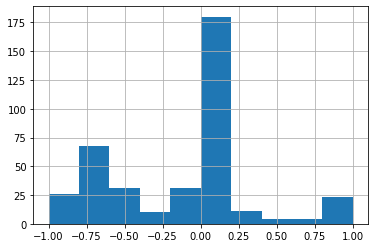

In [ ]:
df_news.impacto_tag_s_n_prob.hist()

In [ ]:
print(df_news.loc[df_news.impacto_tag_s_n_prob < 0].shape)
print(df_news.loc[df_news.impacto_tag_s_n_prob > 0].shape)
print(df_news.loc[df_news.impacto_tag_s_n_prob == 0].shape)

(166, 38)
(63, 38)
(159, 38)


In [ ]:
np.mean(df_news.impacto_tag_s_n_prob)

-0.15747024535808887

In [ ]:
df_news.impacto_tag_s_n_prob.quantile(np.round(np.linspace(0,1,10),1)[1:-1])

0.1   -0.727273
0.2   -0.673203
0.3   -0.515152
0.4   -0.038462
0.6    0.000000
0.7    0.000000
0.8    0.000000
0.9    0.300000
Name: impacto_tag_s_n_prob, dtype: float64

In [ ]:
# df_news.impacto_tag_s_n_prob.quantile(0.9)
df_news.impacto_tag_s_n_prob.quantile(0.7)

0.0

In [ ]:
# umbral = df_news.impacto_tag_s_n_prob.quantile(0.9)
umbral = df_news.impacto_tag_s_n_prob.quantile(0.7)

def func_apply_impacto_tag_s_n(impacto_tag_s_n):
    if impacto_tag_s_n > umbral:
        return 1
    elif impacto_tag_s_n < -umbral:
        return -1
    elif np.isnan(impacto_tag_s_n):
        return np.NaN
    else:
        return 0

In [ ]:
df_news["impacto_tag_news_s_n_agg"] = df_news.impacto_tag_s_n_prob.apply(lambda impacto_tag_s_n_prob : func_apply_impacto_tag_s_n(impacto_tag_s_n_prob))
df_news

,date,title,url,body,tags,resource,ticker,ticker_name,sector,subsector,...,vola20_antepost_pct_change,vola20_umbral_Q1,vola20_umbral_abs_Q1,vola20_umbral_Q3,vola20_umbral_abs_Q3,vola_label,vola_label_abs,impacto_tag_s_n_prob,impacto_tag_news_s_n,impacto_tag_news_s_n_agg
pk,,,,,,,,,,,,,,,,,,,,,
1656287707697_43316_IAG,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,0.086025,0.053808,0.114337,0.305009,0.417972,0.0,0.0,NaN,NaN,NaN
1656287513236_43316_ANA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,ANA,"ACCIONA,S.A.","Mat.Basicos, Industria y Construcción",Construcción,...,0.242440,-0.011209,0.103677,0.208834,0.225065,1.0,1.0,NaN,NaN,NaN
1656287513236_43316_BKIA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,BKIA,"BANKIA, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.729930,0.057276,0.103478,0.236113,0.315340,1.0,1.0,NaN,NaN,NaN
1656287513236_43316_CABK,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.679042,0.092034,0.139145,0.290371,0.324701,1.0,1.0,NaN,NaN,NaN
1656287513236_43316_IAG,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,0.086025,0.053808,0.114337,0.305009,0.417972,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656406861597_6_REP,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,REP,"REPSOL, S.A.",Petróleo y Energía,Petróleo,...,0.271928,-0.357201,0.272479,-0.270908,0.357201,1.0,0.0,NaN,NaN,NaN
1656406861597_6_TEF,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,-0.373501,-0.477420,0.399914,-0.399914,0.477420,1.0,0.0,NaN,NaN,NaN
1656407079517_9_CABK,2022-01-03 10:08:00,CaixaBank Banca Privada recomienda a gran part...,https://www.europapress.es/economia/finanzas-0...,"MADRID, 28 Dic. (EUROPA PRESS) -<EOL>CaixaBank...","['Sector financiero', 'Caixabank']",EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.426654,-0.089311,0.053781,0.059615,0.251531,1.0,1.0,NaN,NaN,NaN


In [ ]:
df_news.impacto_tag_news_s_n_agg[df_news.impacto_tag_news_s_n.notna()] = df_news.impacto_tag_news_s_n_agg[df_news.impacto_tag_news_s_n.notna()] + 1
# [('Sí', 0),
# ('No', 1), 
# ('Duda', 2),]
print(df_news.impacto_tag_news_s_n.value_counts())
print(df_news.impacto_tag_news_s_n_agg.value_counts())

1.0    162
0.0    138
2.0     88
Name: impacto_tag_news_s_n, dtype: int64
0.0    166
1.0    159
2.0     63
Name: impacto_tag_news_s_n_agg, dtype: int64


C:\Users\Tienda\AppData\Local\Temp/ipykernel_102980/2990027567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news.impacto_tag_news_s_n_agg[df_news.impacto_tag_news_s_n.notna()] = df_news.impacto_tag_news_s_n_agg[df_news.impacto_tag_news_s_n.notna()] + 1


In [ ]:
acc = np.sum(df_news[df_news.impacto_tag_news_s_n.notna()].impacto_tag_news_s_n == df_news[df_news.impacto_tag_news_s_n.notna()].impacto_tag_news_s_n_agg) / df_news[df_news.impacto_tag_news_s_n.notna()].shape[0]
acc

0.8737113402061856

# EVALUAMOS EL AGRUPADOR SOBRE FINANCIERO S_N

In [ ]:
df_news = pd.read_csv(file_path_news, sep=";", parse_dates=["date"], index_col=0)

In [ ]:
df_paragraph = pd.read_csv(file_path_paragraph, sep=";", parse_dates=["date"], index_col=0)

In [ ]:
df_paragraph.finanzas_tag_s_n.value_counts()
# [('Sí', 0),
# ('No', 1), 
# ('Duda', 2),]

1.0    4524
0.0     935
2.0       6
Name: finanzas_tag_s_n, dtype: int64

In [ ]:
df_paragraph.finanzas_tag_news_s_n.value_counts()

1.0    4119
0.0    1305
2.0      41
Name: finanzas_tag_news_s_n, dtype: int64

In [ ]:
df_paragraph["finanzas_tag_s_n"] = df_paragraph["finanzas_tag_s_n"] - 1
df_paragraph.finanzas_tag_s_n.value_counts()
# [('Sí', -1),
# ('No', 0), 
# ('Duda', 1),]

 0.0    4524
-1.0     935
 1.0       6
Name: finanzas_tag_s_n, dtype: int64

In [ ]:
def func_apply(group):
    # ponderacion de pesos
    idx = np.linspace(1,0,group.shape[0])    
    return np.sum(idx * group.finanzas_tag_s_n) / np.sum(idx)

In [ ]:
df_paragraph = df_paragraph[df_paragraph.finanzas_tag_s_n.notna()]

In [ ]:
df_paragraph_grpby = df_paragraph.groupby(['pk'])
a = df_paragraph_grpby.apply(lambda x: func_apply(x)).to_frame(name='finanzas_tag_s_n_prob')
#first : todo el grupo debería tener la misma etiqueta impacto_tag_news_s_n
b = df_paragraph_grpby.agg({'intensidad':'sum', 'finanzas_tag_news_s_n':'first'})
df_paragraph_agg = b.join(a)
print(df_paragraph_agg)

                          intensidad  finanzas_tag_news_s_n  \
pk                                                            
1656289470276_43316_IAG    16.069068                    1.0   
1656290550304_43316_BBVA   45.130420                    1.0   
1656290550304_43316_BKIA   23.130420                    1.0   
1656290550304_43316_CABK   23.130420                    1.0   
1656290550304_43316_SAB    23.130420                    1.0   
...                              ...                    ...   
1656406912310_9_CABK        5.000000                    1.0   
1656407554675_6_AMS        12.000000                    1.0   
1656407672873_9_BBVA       30.119933                    1.0   
1656407672873_9_CABK       30.119933                    1.0   
1656407672873_9_SAN        30.119933                    1.0   

                          finanzas_tag_s_n_prob  
pk                                               
1656289470276_43316_IAG                     0.0  
1656290550304_43316_BBVA      

In [ ]:
df_news["finanzas_tag_s_n_prob"] = df_paragraph_agg["finanzas_tag_s_n_prob"]
df_news["finanzas_tag_news_s_n"] = df_paragraph_agg["finanzas_tag_news_s_n"]

<AxesSubplot:>

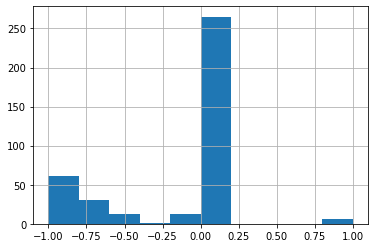

In [ ]:
df_news.finanzas_tag_s_n_prob.hist()

In [ ]:
print(df_news.loc[df_news.finanzas_tag_s_n_prob < 0].shape)
print(df_news.loc[df_news.finanzas_tag_s_n_prob > 0].shape)
print(df_news.loc[df_news.finanzas_tag_s_n_prob == 0].shape)

(117, 38)
(6, 38)
(265, 38)


In [ ]:
np.mean(df_news.finanzas_tag_s_n_prob)

-0.21301190386999969

In [ ]:
df_news.finanzas_tag_s_n_prob.quantile(np.round(np.linspace(0,1,10),1)[1:-1])

0.1   -1.000000
0.2   -0.748182
0.3   -0.023377
0.4    0.000000
0.6    0.000000
0.7    0.000000
0.8    0.000000
0.9    0.000000
Name: finanzas_tag_s_n_prob, dtype: float64

In [ ]:
# df_news.impacto_tag_s_n_prob.quantile(0.9)
df_news.finanzas_tag_s_n_prob.quantile(0.7)

0.0

In [ ]:
# umbral = df_news.impacto_tag_s_n_prob.quantile(0.9)
umbral = df_news.finanzas_tag_s_n_prob.quantile(0.7)

def func_apply_finanzas_tag_s_n(finanzas_tag_s_n):
    if finanzas_tag_s_n > umbral:
        return 1
    elif finanzas_tag_s_n < -umbral:
        return -1
    elif np.isnan(finanzas_tag_s_n):
        return np.NaN
    else:
        return 0

In [ ]:
df_news["finanzas_tag_news_s_n_agg"] = df_news.finanzas_tag_s_n_prob.apply(lambda finanzas_tag_s_n_prob : func_apply_finanzas_tag_s_n(finanzas_tag_s_n_prob))
df_news

,date,title,url,body,tags,resource,ticker,ticker_name,sector,subsector,...,vola20_antepost_pct_change,vola20_umbral_Q1,vola20_umbral_abs_Q1,vola20_umbral_Q3,vola20_umbral_abs_Q3,vola_label,vola_label_abs,finanzas_tag_s_n_prob,finanzas_tag_news_s_n,finanzas_tag_news_s_n_agg
pk,,,,,,,,,,,,,,,,,,,,,
1656287707697_43316_IAG,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,0.086025,0.053808,0.114337,0.305009,0.417972,0.0,0.0,NaN,NaN,NaN
1656287513236_43316_ANA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,ANA,"ACCIONA,S.A.","Mat.Basicos, Industria y Construcción",Construcción,...,0.242440,-0.011209,0.103677,0.208834,0.225065,1.0,1.0,NaN,NaN,NaN
1656287513236_43316_BKIA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,BKIA,"BANKIA, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.729930,0.057276,0.103478,0.236113,0.315340,1.0,1.0,NaN,NaN,NaN
1656287513236_43316_CABK,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.679042,0.092034,0.139145,0.290371,0.324701,1.0,1.0,NaN,NaN,NaN
1656287513236_43316_IAG,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,0.086025,0.053808,0.114337,0.305009,0.417972,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656406861597_6_REP,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,REP,"REPSOL, S.A.",Petróleo y Energía,Petróleo,...,0.271928,-0.357201,0.272479,-0.270908,0.357201,1.0,0.0,NaN,NaN,NaN
1656406861597_6_TEF,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,-0.373501,-0.477420,0.399914,-0.399914,0.477420,1.0,0.0,NaN,NaN,NaN
1656407079517_9_CABK,2022-01-03 10:08:00,CaixaBank Banca Privada recomienda a gran part...,https://www.europapress.es/economia/finanzas-0...,"MADRID, 28 Dic. (EUROPA PRESS) -<EOL>CaixaBank...","['Sector financiero', 'Caixabank']",EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.426654,-0.089311,0.053781,0.059615,0.251531,1.0,1.0,NaN,NaN,NaN


In [ ]:
df_news.finanzas_tag_news_s_n_agg[df_news.finanzas_tag_news_s_n.notna()] = df_news.finanzas_tag_news_s_n_agg[df_news.finanzas_tag_news_s_n.notna()] + 1
# [('Sí', 0),
# ('No', 1), 
# ('Duda', 2),]
print(df_news.finanzas_tag_news_s_n.value_counts())
print(df_news.finanzas_tag_news_s_n_agg.value_counts())

1.0    259
0.0    119
2.0     10
Name: finanzas_tag_news_s_n, dtype: int64
1.0    265
0.0    117
2.0      6
Name: finanzas_tag_news_s_n_agg, dtype: int64


C:\Users\Tienda\AppData\Local\Temp/ipykernel_102980/395435762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news.finanzas_tag_news_s_n_agg[df_news.finanzas_tag_news_s_n.notna()] = df_news.finanzas_tag_news_s_n_agg[df_news.finanzas_tag_news_s_n.notna()] + 1


In [ ]:
acc = np.sum(df_news[df_news.finanzas_tag_news_s_n.notna()].finanzas_tag_news_s_n == df_news[df_news.finanzas_tag_news_s_n.notna()].finanzas_tag_news_s_n_agg) / df_news[df_news.finanzas_tag_news_s_n.notna()].shape[0]
acc

0.9149484536082474